In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [79]:
n_samples = 50  # 50 Training points for both cases.
colours = ('green', 'red')  # colors for case 1 and 2

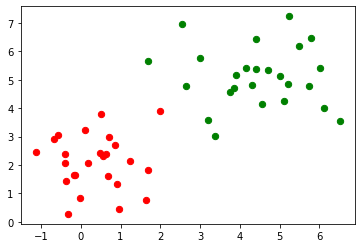

In [80]:
## CASE 1 TRAINING POINTS ARE LINEARLY SEPARABLE.

c1_samples, labels = make_blobs(n_samples = n_samples, 
                             centers = ([4.25, 5], [0.5, 2]), 
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c1_samples[labels == i][:, 0], c1_samples[labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
plt.show()

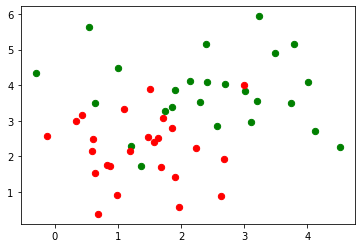

In [81]:
## CASE 2 TRAINING POINTS ARE (NOT) LINEARLY SEPARABLE.

# The project says "test data set remains the same for the two different training sets" Does this mean to find
# the line that separates the two cases and then generate a new training set that's not linearly separable?

c2_samples, c2_labels = make_blobs(n_samples = n_samples, 
                             centers = ([2.25, 3.7], [1.5, 2.1]),  # We just need to move these points closer together.
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c2_samples[c2_labels == i][:, 0], c2_samples[c2_labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
plt.show()

In [82]:
samples == c2_samples # Checking to make sure the two training sets are completely different


array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal